FINAL PROJECT OF EETBS COURSE - 2020-2021

**NIMA RAZMJOO**

#1- Selection and handling dataset

In this project, our aim is to use machine learning, in order to predict the **HVAC consumption** based on the relevant dataset that we have.

The dataset that we used in this project, is the energy and environment data related to a **"Research House"** in a period of **1 year**. Thanks to the different sensors existing in this place, we are given some data related to:

* Temperature in different parts of the house.
* Energy consumption of different devices, appliences and HVAC system.
* Relative humidity.
* Heat fluxes in some parts of the house.
* Solar radiation.

In this first part, our aim is to handle the initial dataset and **keep the most relevant data**, regarding the HVAC consumption prediction of this house.

##1-1- Importing Gdrive and modules

First, we mount the google drive, where we can import our dataset to the Python for further processes:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


We also import relevant modules in Python that we will further use some of their functions during this implementation:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

##1-2- Importing dataset as dataframe

We set the path of the dataset file in the google drive, and then convert it to a dataframe (from Pandas module). As we have data for a period of 1 year, we use **parse_dates** command in order to make Python, to percept the data in each row for the corrosponding date and time:

In [ ]:
projectPath = "/content/gdrive/MyDrive/Colab Notebooks/N-Final Project"
dataSetPath = "/content/gdrive/MyDrive/Colab Notebooks/N-Final Project/ornlbtricdatafromcc3fy2014.csv"

In [ ]:
DF_dataSet = pd.read_csv(dataSetPath,index_col=0,parse_dates=True)
DF_dataSet.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (68,71,83,84,101) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RECORD,main_Tot,Batt_Volt_Avg,PV_generated_Tot,HP_in_Tot,HP_out_Tot,Fantech_Tot,solar_HW_pump_Tot,HW_Tot,bathup_lts_Tot,LVL1_lts_Tot,bed_Tot,dryer_Tot,wash_Tot,kitch_plg_Tot,LVL1_plg_Tot,gar_ext_plg_Tot,fridge_Tot,dish_Tot,range_Tot,RoofS_tmp_Avg,AtticFlrS_tmp_Avg,RoofN_tmp_Avg,AtticFlrN_tmp_Avg,BonusFlr_tmp_Avg,CantFlr_tmp_Avg,WallNcav_tmp_Avg,WallNsrf_tmp_Avg,WallScav_tmp_Avg,WallSsrf_tmp_Avg,FanTsup_tmp_Avg,FanTret_tmp_Avg,FanTexh_tmp_Avg,FanTint_tmp_Avg,Din_tmp_Avg,Grt_tmp_Avg,Brkf_tmp_Avg,Kit_tmp_Avg,BedM_tmp_Avg,Bed3_tmp_Avg,...,CantFlr_HFT_Avg,NWallcav_HFT_Avg,SWallcav_HFT_Avg,LVL2_Tmp_Avg,LVL1_Tmp_Avg,Attic_Tmp_Avg,LVL2_RH_Avg,LVL1_RH_Avg,Attic_RH_Avg,HWhot_tmp_Avg,HWcold_tmp_Avg,Shower_tmp_Avg,HW_flow_Tot,WHouse_flow_Tot,DishHot_flow_Tot,WashCold_flow_Tot,WashHot_flow_Tot,MShower_flow_Tot,FanT_SUPflow_Tot,FanT_RETflow_Tot,Outside_Tmp_Avg,Outside_RH_Avg,wind_speed_mean,wind_dir_mean,wind_dir_std,SlrW1_Avg,SlrW_Avg,SlrW_PV_Avg,SlrW_Swall_Avg,Rain_in_Tot,bath_plg_Tot,gar_ext_lts_Tot,garage_tmp_Avg,jacuzzi_plg_Tot,dishHot_tmp_Avg,washHot_tmp_Avg,L1_heater_Tot,Tstat1_tmp_Avg,Tstat2_tmp_Avg,TV_plg_Tot
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-10 00:15:00,767,175.0,12.82,0.00,2.5,8.25,9.000,0.0,0.0,2.5,0.625,3.250,0.5,0.25,7.00,18.79,2.625,0.375,25.000,0.0,63.63,76.43,63.42,75.14,72.93,73.32,62.73,74.07,63.87,74.90,72.93,75.83,66.07,62.24,74.82,75.36,75.27,75.42,76.03,74.86,...,-0.065,0.931,0.976,75.93,76.07,67.85,51.65,52.67,57.05,NAN,NAN,NAN,0.0,0.0,0.0,0.0,0.0,0.0,436.7,479.5,60.95,93.1,0.0,0.0,0.0,0.0,0.050,45.01,0.106,0.0,6.750,0.50,69.92,33.88,NAN,NAN,48.38,76.40,NAN,0.208
2013-01-10 00:30:00,768,250.0,12.81,0.75,5.0,15.75,0.708,0.0,0.0,0.5,1.375,5.125,0.5,0.50,12.25,36.88,5.375,0.750,2.625,1.0,63.13,76.50,62.97,75.17,72.98,73.34,62.46,74.08,63.53,74.89,NAN,NAN,NAN,NAN,74.96,75.56,75.37,75.43,75.91,74.87,...,-0.065,0.955,1.027,75.95,76.13,67.38,51.73,52.31,57.58,NAN,NAN,NAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.63,93.2,0.0,0.0,0.0,0.0,0.049,47.18,0.077,0.0,0.625,1.25,69.87,61.25,NAN,NAN,93.00,76.40,NAN,0.375
2013-01-10 00:45:00,769,182.5,12.81,0.75,5.0,15.75,18.250,0.0,0.0,0.5,1.375,2.250,0.5,0.50,14.00,35.85,5.500,0.750,2.500,1.0,62.39,76.51,62.31,75.19,73.01,73.40,62.05,74.08,62.98,74.85,72.75,75.58,65.72,61.97,74.74,75.01,75.04,75.13,75.83,74.85,...,-0.065,0.985,1.097,75.95,76.08,66.76,51.52,52.34,58.11,NAN,NAN,NAN,0.0,0.0,0.0,0.0,0.0,0.0,1060.0,1167.0,60.13,93.4,0.0,0.0,0.0,0.0,0.112,36.75,0.133,0.0,0.750,1.25,69.81,68.00,NAN,NAN,0.50,76.27,NAN,0.396


The important points we can notice from the above dataframe:

* The time step is **15 minutes**. In fact, we have the data through the days between 2013-10-01 to 2014-10-01 which are read by the relevant sensors each 15 minutes.
* There are 101 different parameters that is measured by the sensors. Obviously, some of these data are irrelevant for our application.
* As there are too many data, we only keep some of them that are most relevant to our application (such as relevant energy consumption, average inside temperature, outside temperature and relative humidity)

##1-3- Define relevant prameters

Among the above data, the ones that are related to the use of HVAC system, is related to:

* Heat pump consumption
* Recovery ventilator consumption
* Heater which is existing in the bathroom
* The heater in the 1st floor

Other data are related to the hot water heaters, appliences and lamps. So we will categorize the electricity consumption data into below categories each of which is a representative of the electricity consumption category:

**HVAC consumption**

In [ ]:
DF_dataSet["HVAC consumption"] = DF_dataSet.loc[:,"HP_in_Tot"] + DF_dataSet.loc[:,"HP_out_Tot"] + DF_dataSet.loc[:,"Fantech_Tot"] + DF_dataSet.loc[:,"bath_plg_Tot"]

**Appliance consumption**

In [ ]:
DF_dataSet["Applience consumption"] = DF_dataSet.loc[:,"dryer_Tot"] + DF_dataSet.loc[:,"wash_Tot"] + DF_dataSet.loc[:,"fridge_Tot"] + DF_dataSet.loc[:,"dish_Tot"] + DF_dataSet.loc[:,"TV_plg_Tot"]

**Other: lights, plugs**

In [ ]:
DF_dataSet["Other consumption"] = DF_dataSet.loc[:,"bathup_lts_Tot"] + DF_dataSet.loc[:,"LVL1_lts_Tot"] + DF_dataSet.loc[:,"bed_Tot"] + DF_dataSet.loc[:,"kitch_plg_Tot"] + DF_dataSet.loc[:,"LVL1_plg_Tot"] + DF_dataSet.loc[:,"gar_ext_plg_Tot"] + DF_dataSet.loc[:,"gar_ext_lts_Tot"] + DF_dataSet.loc[:,"jacuzzi_plg_Tot"]

Now, we can remove the update our dataframe with the selected relevant parameters:

In [ ]:
DF_dataSetSelected = DF_dataSet.loc[:,["main_Tot",
                                       "HVAC consumption",
                                       "Applience consumption",
                                       "Other consumption",
                                       "Outside_Tmp_Avg",
                                       "Grt_tmp_Avg",
                                       "garage_tmp_Avg",
                                       "Outside_RH_Avg",
                                       "CantFlr_RH_Avg",
                                       "wind_speed_mean",
                                       "SlrW1_Avg"]]
DF_dataSetSelected.head(3)

,main_Tot,HVAC consumption,Applience consumption,Other consumption,Outside_Tmp_Avg,Grt_tmp_Avg,garage_tmp_Avg,Outside_RH_Avg,CantFlr_RH_Avg,wind_speed_mean,SlrW1_Avg
TIMESTAMP,,,,,,,,,,,
2013-01-10 00:15:00,175.0,26.500,26.333,69.170,60.95,75.36,69.92,93.1,58.13,0.0,0.0
2013-01-10 00:30:00,250.0,22.083,4.750,124.005,60.63,75.56,69.87,93.2,58.14,0.0,0.0
2013-01-10 00:45:00,182.5,39.750,4.646,128.725,60.13,75.01,69.81,93.4,58.20,0.0,0.0


We can also change the column names of the variables in order to be better percepted:

In [ ]:
DF_dataSetSelected = DF_dataSetSelected.rename(columns={"main_Tot":"Total consumption",
                                                        "Outside_Tmp_Avg":"Outside temperature",
                                                        "Grt_tmp_Avg":"Inside temperature",
                                                        "garage_tmp_Avg":"Garage temperature",
                                                        "Outside_RH_Avg":"Outside RH",
                                                        "CantFlr_RH_Avg":"Inside RH",
                                                        "wind_speed_mean":"Wind speed",
                                                        "SlrW1_Avg":"Solar radiation"})
DF_dataSetSelected.head(3)

,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation
TIMESTAMP,,,,,,,,,,,
2013-01-10 00:15:00,175.0,26.500,26.333,69.170,60.95,75.36,69.92,93.1,58.13,0.0,0.0
2013-01-10 00:30:00,250.0,22.083,4.750,124.005,60.63,75.56,69.87,93.2,58.14,0.0,0.0
2013-01-10 00:45:00,182.5,39.750,4.646,128.725,60.13,75.01,69.81,93.4,58.20,0.0,0.0


At this step, we have  the relevant data that we need for implemention of our machine learning model.

*NOTE: To recap again, as for this specific dataset, there were too many sensors implemented inside the building, we filtered the most relevant one as well as combining some of them to reach the desired parameter.*

So, this is our final dataframe to be implemented in the further procedure. We can save this dataframe as an excel file as below:

In [ ]:
DF_dataSetSelected_fileName = "Razmjoo_FinalProjectData"
DF_dataSetSelected_filePath = os.path.join(projectPath,DF_dataSetSelected_fileName)

In [ ]:
DF_dataSetSelected.to_csv(DF_dataSetSelected_filePath)

##1-4- Limitting timestamps

The dataset that we are dealing with, represents data for a time step of **15 minutes**. As for our application, the time step of **1 hour** seems enough, to avoid dealing with excess data and save time and cost of calculations, we only select the data starting from 01:00:00 of 2013-10-01 with a time step of 1 hour as below:

In [ ]:
DF_dataSetSelected = pd.read_csv(DF_dataSetSelected_filePath,parse_dates=True)

In [ ]:
DF_additive = pd.DataFrame(DF_dataSetSelected.loc[3])
for i in range(7,35041,4):
  DF_to_add = DF_dataSetSelected.loc[i]
  DF_additive = DF_additive.join(DF_to_add)
DF_dataSetSelectedStep = DF_additive.transpose()
DF_dataSetSelectedStep

,TIMESTAMP,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation
3,2013-01-10 01:00:00,165,24.042,16.672,119.205,59.66,74.76,69.79,93.5,58.2,0,0.003
7,2013-01-10 02:00:00,170,22.042,22.901,116.725,58.15,74.75,69.64,94.2,58.2,0,0
11,2013-01-10 03:00:00,157.5,22.083,2.646,124.73,56.57,74.39,69.5,94.0,58.27,0,0
15,2013-01-10 04:00:00,157.5,22.042,2.646,124.35,56.03,74.18,69.38,94.6,58.25,0,0
19,2013-01-10 05:00:00,172.5,22.833,24.776,118.36,55.18,74.18,69.29,94.7,58.16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35023,2014-09-30 20:00:00,230,38.083,15.27,165.1,68.33,74.24,72.18,84.8,59.27,0,0
35027,2014-09-30 21:00:00,212.5,35.708,27.625,146.25,65.05,75.13,71.9,91.7,59.4,0,0
35031,2014-09-30 22:00:00,337.5,68.833,29.71,139.675,63.14,74.63,71.63,94.3,59.45,0,0.003
35035,2014-09-30 23:00:00,210,29.333,35.96,141.555,61.32,74.92,71.45,96.6,59.51,0,0.04


As we can see, we selected the hourly data by the above command. Now, we can update the index column to show the timestamp instead of the counter of the initial dataframe:

In [ ]:
DF_dataSetSelectedStep.index = DF_dataSetSelectedStep["TIMESTAMP"]
DF_dataSetSelectedStep = DF_dataSetSelectedStep.drop(columns="TIMESTAMP")
DF_dataSetSelectedStep

,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation
TIMESTAMP,,,,,,,,,,,
2013-01-10 01:00:00,165,24.042,16.672,119.205,59.66,74.76,69.79,93.5,58.2,0,0.003
2013-01-10 02:00:00,170,22.042,22.901,116.725,58.15,74.75,69.64,94.2,58.2,0,0
2013-01-10 03:00:00,157.5,22.083,2.646,124.73,56.57,74.39,69.5,94.0,58.27,0,0
2013-01-10 04:00:00,157.5,22.042,2.646,124.35,56.03,74.18,69.38,94.6,58.25,0,0
2013-01-10 05:00:00,172.5,22.833,24.776,118.36,55.18,74.18,69.29,94.7,58.16,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-09-30 20:00:00,230,38.083,15.27,165.1,68.33,74.24,72.18,84.8,59.27,0,0
2014-09-30 21:00:00,212.5,35.708,27.625,146.25,65.05,75.13,71.9,91.7,59.4,0,0
2014-09-30 22:00:00,337.5,68.833,29.71,139.675,63.14,74.63,71.63,94.3,59.45,0,0.003


To recap, we decrease the initial 35040 rows of data with the 15 minutes time step to 8760 rows of data which is enough for our further analysis. This would be our main data frame that we are going to implement machine learning model on it.


We save this dataframe as below:

In [ ]:
DF_dataSetSelectedStep_fileName = "Razmjoo_FinalProjectDataHour"
DF_dataSetSelectedStep_filePath = os.path.join(projectPath,DF_dataSetSelectedStep_fileName)

In [ ]:
DF_dataSetSelectedStep.to_csv(DF_dataSetSelectedStep_filePath)

#2- Feature generation

First, it is better to have a fresh read of our created hourly data here. This is helpful (from previous experiences!) in order to avoid error as we will performe some trial-error procedure during writing this code:

In [ ]:
DF = pd.read_csv(DF_dataSetSelectedStep_filePath,index_col=0,parse_dates=True)
DF.head(3)

,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation
TIMESTAMP,,,,,,,,,,,
2013-01-10 01:00:00,165.0,24.042,16.672,119.205,59.66,74.76,69.79,93.5,58.20,0.0,0.003
2013-01-10 02:00:00,170.0,22.042,22.901,116.725,58.15,74.75,69.64,94.2,58.20,0.0,0.000
2013-01-10 03:00:00,157.5,22.083,2.646,124.730,56.57,74.39,69.50,94.0,58.27,0.0,0.000


As our aim is to predict the HVAC consumption based on a machine learning model, we must create some additional features that we think it might be helpful for our model, to learn from them for accurate prediction. These extra features can be mainly divided to:

* **Lagged values:** For creating this type of features, we use the data for following days/hours as a feature of a **specific timestamp**. Our purpose, is to identify the probable parameters that might affect the HVAC consumption due to the inertia of the system.
* **Time related features:** These type of features can be extracted directly through the *timestamp* of each raw of data. The purpose of adding these features is to consider the probable effects of time-related data to the HVAC consumption in a specific timestamp.
* **Extra features:** We are going to add some extra features, based on the time related features that we previously created. This category of features are mainly related to the patterns and behaviours of the people inside the building, that we think might have effect on the HVAC consumption.

##2-1- Lagged values

For this purpose, we can define a **function** which is able to get the values of the target column that we need to make lagged values from, as well as the range of target lags. As an output, it generate new columns and put corrosponding calculated features for each row:

In [ ]:
def laggedColumnCreator(df,columnName,lagStart,lagEnd,lagInterval):
  for i in range(lagStart,lagEnd+1,lagInterval):
    newColumnName = columnName + " -" + str(i) + "h"
    df[newColumnName] = df[columnName].shift(i)
    df.dropna(inplace=True)
  return

First, we can implement this lagged function creator for the "Outside temperature". So, we add values of outside temperature for previous hours of each timestamp. At this stage, we cannot be sure that which of this created feature helps our machine learning model to better predict the HVAC consumption. But as due to the knowledge of inertia of the system to precept the outside condition, it seems logical to add them:

In [ ]:
laggedColumnCreator(DF,"Outside temperature",1,6,1)

We can do the simillar procedure for the "Outside RH" (relative humidity), "Solar irradiance", and "HVAC consumption" as below for relevant period of time for each feature, based on their characteristics:

In [ ]:
laggedColumnCreator(DF,"Outside RH",1,6,1)
laggedColumnCreator(DF,"Solar radiation",3,6,1)
laggedColumnCreator(DF,"HVAC consumption",1,24,1)

In [ ]:
DF.head(3)

,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation,Outside temperature -1h,Outside temperature -2h,Outside temperature -3h,Outside temperature -4h,Outside temperature -5h,Outside temperature -6h,Outside RH -1h,Outside RH -2h,Outside RH -3h,Outside RH -4h,Outside RH -5h,Outside RH -6h,Solar radiation -3h,Solar radiation -4h,Solar radiation -5h,Solar radiation -6h,HVAC consumption -1h,HVAC consumption -2h,HVAC consumption -3h,HVAC consumption -4h,HVAC consumption -5h,HVAC consumption -6h,HVAC consumption -7h,HVAC consumption -8h,HVAC consumption -9h,HVAC consumption -10h,HVAC consumption -11h,HVAC consumption -12h,HVAC consumption -13h,HVAC consumption -14h,HVAC consumption -15h,HVAC consumption -16h,HVAC consumption -17h,HVAC consumption -18h,HVAC consumption -19h,HVAC consumption -20h,HVAC consumption -21h,HVAC consumption -22h,HVAC consumption -23h,HVAC consumption -24h
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-10-16 01:00:00,162.5,22.042,4.771,125.360,62.56,74.61,69.79,84.6,59.01,0.000,0.00,62.77,62.82,62.89,63.96,65.28,67.02,87.8,91.1,91.8,89.5,86.3,81.6,0.0,0.0,0.0,4.002,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,22.792,22.083
2013-10-16 02:00:00,162.5,22.833,8.167,124.335,61.73,74.46,69.69,85.2,59.05,0.065,0.00,62.56,62.77,62.82,62.89,63.96,65.28,84.6,87.8,91.1,91.8,89.5,86.3,0.0,0.0,0.0,0.000,22.042,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,22.792
2013-10-16 03:00:00,182.5,22.792,26.151,125.115,60.60,74.54,69.55,86.4,59.04,0.000,0.01,61.73,62.56,62.77,62.82,62.89,63.96,85.2,84.6,87.8,91.1,91.8,89.5,0.0,0.0,0.0,0.000,22.833,22.042,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833


##2-2- Time related features

In [ ]:
def timeRelatedFeaturesCreator(DF):
  DF["Hour"] = DF.index.hour
  DF["Sin(hour)"] = np.sin(DF.index.hour*(2*np.pi/24))
  DF["Cos(hour)"] = np.cos(DF.index.hour*(2*np.pi/24))
  DF["DayOfWeek"] = DF.index.dayofweek
  DF["Month"] = DF.index.month
  DF["WeekOfYear"] = DF.index.week
  #Weekend flag
  DF.loc[DF["DayOfWeek"]>4,"WeekendFlag"] = 1
  DF.loc[DF["DayOfWeek"]<5,"WeekendFlag"] = 0
  return

In [ ]:
timeRelatedFeaturesCreator(DF)
DF.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation,Outside temperature -1h,Outside temperature -2h,Outside temperature -3h,Outside temperature -4h,Outside temperature -5h,Outside temperature -6h,Outside RH -1h,Outside RH -2h,Outside RH -3h,Outside RH -4h,Outside RH -5h,Outside RH -6h,Solar radiation -3h,Solar radiation -4h,Solar radiation -5h,Solar radiation -6h,HVAC consumption -1h,HVAC consumption -2h,HVAC consumption -3h,HVAC consumption -4h,HVAC consumption -5h,HVAC consumption -6h,HVAC consumption -7h,HVAC consumption -8h,HVAC consumption -9h,HVAC consumption -10h,HVAC consumption -11h,HVAC consumption -12h,HVAC consumption -13h,HVAC consumption -14h,HVAC consumption -15h,HVAC consumption -16h,HVAC consumption -17h,HVAC consumption -18h,HVAC consumption -19h,HVAC consumption -20h,HVAC consumption -21h,HVAC consumption -22h,HVAC consumption -23h,HVAC consumption -24h,Hour,Sin(hour),Cos(hour),DayOfWeek,Month,WeekOfYear,WeekendFlag
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-10-16 01:00:00,162.5,22.042,4.771,125.360,62.56,74.61,69.79,84.6,59.01,0.000,0.00,62.77,62.82,62.89,63.96,65.28,67.02,87.8,91.1,91.8,89.5,86.3,81.6,0.0,0.0,0.0,4.002,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,22.792,22.083,1,0.258819,0.965926,2,10,42,0.0
2013-10-16 02:00:00,162.5,22.833,8.167,124.335,61.73,74.46,69.69,85.2,59.05,0.065,0.00,62.56,62.77,62.82,62.89,63.96,65.28,84.6,87.8,91.1,91.8,89.5,86.3,0.0,0.0,0.0,0.000,22.042,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,22.792,2,0.500000,0.866025,2,10,42,0.0
2013-10-16 03:00:00,182.5,22.792,26.151,125.115,60.60,74.54,69.55,86.4,59.04,0.000,0.01,61.73,62.56,62.77,62.82,62.89,63.96,85.2,84.6,87.8,91.1,91.8,89.5,0.0,0.0,0.0,0.000,22.833,22.042,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,3,0.707107,0.707107,2,10,42,0.0


##3-2- Extra features

As we previously said, by creating these extra features, our aim to see the effects of the pattern and schedule of the people related to this house on the HVAC consumption. For this reason, we are going to add some features related to the working hours, school hours and etc. as below:

In [ ]:
def extraFeaturesCreator(DF):
  #Working hour flag
  DF.loc[:,"WorkingHour"] = 0
  DF.loc[(DF["Hour"]>8) & (DF["Hour"]<19),"WorkingHour"] = 1
  #Lunch hour
  DF.loc[:,"LunchHour"] = 0
  DF.loc[(DF["Hour"]>12) & (DF["Hour"]<15),"LunchHour"] = 1
  #School hour
  DF.loc[:,"SchoolHour"] = 0
  DF.loc[(DF["Hour"]>8) & (DF["Hour"]<14),"SchoolHour"] = 1
  #Shower hour
  DF.loc[:,"ShowerHour"] = 0
  DF.loc[(DF["Hour"]>5) & (DF["Hour"]<8),"ShowerHour"] = 1
  DF.loc[(DF["Hour"]>17) & (DF["Hour"]<20),"ShowerHour"] = 1
  #Night time gathering
  DF.loc[:,"NightTimeGathering"] = 0
  DF.loc[(DF["DayOfWeek"]==4) & (DF["Hour"]>19) & (DF["Hour"]<23),"NightTimeGathering"] = 1
  DF.loc[(DF["DayOfWeek"]==5) & (DF["Hour"]>19) & (DF["Hour"]<23),"NightTimeGathering"] = 1
  #Sunday cleanday
  DF.loc[:,"SundayCleaning"] = 0
  DF.loc[(DF["DayOfWeek"]==6) & (DF["Hour"]>9) & (DF["Hour"]<14),"SundayCleaning"] = 1
  return

In [ ]:
extraFeaturesCreator(DF)
DF.head(3)

,Total consumption,HVAC consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation,Outside temperature -1h,Outside temperature -2h,Outside temperature -3h,Outside temperature -4h,Outside temperature -5h,Outside temperature -6h,Outside RH -1h,Outside RH -2h,Outside RH -3h,Outside RH -4h,Outside RH -5h,Outside RH -6h,Solar radiation -3h,Solar radiation -4h,Solar radiation -5h,Solar radiation -6h,HVAC consumption -1h,HVAC consumption -2h,HVAC consumption -3h,HVAC consumption -4h,HVAC consumption -5h,HVAC consumption -6h,HVAC consumption -7h,HVAC consumption -8h,HVAC consumption -9h,HVAC consumption -10h,HVAC consumption -11h,HVAC consumption -12h,HVAC consumption -13h,HVAC consumption -14h,HVAC consumption -15h,HVAC consumption -16h,HVAC consumption -17h,HVAC consumption -18h,HVAC consumption -19h,HVAC consumption -20h,HVAC consumption -21h,HVAC consumption -22h,HVAC consumption -23h,HVAC consumption -24h,Hour,Sin(hour),Cos(hour),DayOfWeek,Month,WeekOfYear,WeekendFlag,WorkingHour,LunchHour,SchoolHour,ShowerHour,NightTimeGathering,SundayCleaning
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-10-16 01:00:00,162.5,22.042,4.771,125.360,62.56,74.61,69.79,84.6,59.01,0.000,0.00,62.77,62.82,62.89,63.96,65.28,67.02,87.8,91.1,91.8,89.5,86.3,81.6,0.0,0.0,0.0,4.002,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,22.792,22.083,1,0.258819,0.965926,2,10,42,0.0,0,0,0,0,0,0
2013-10-16 02:00:00,162.5,22.833,8.167,124.335,61.73,74.46,69.69,85.2,59.05,0.065,0.00,62.56,62.77,62.82,62.89,63.96,65.28,84.6,87.8,91.1,91.8,89.5,86.3,0.0,0.0,0.0,0.000,22.042,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,22.792,2,0.500000,0.866025,2,10,42,0.0,0,0,0,0,0,0
2013-10-16 03:00:00,182.5,22.792,26.151,125.115,60.60,74.54,69.55,86.4,59.04,0.000,0.01,61.73,62.56,62.77,62.82,62.89,63.96,85.2,84.6,87.8,91.1,91.8,89.5,0.0,0.0,0.0,0.000,22.833,22.042,23.292,22.833,22.083,22.833,22.792,24.042,244.092,22.083,22.833,22.833,277.833,24.083,22.042,22.792,24.042,22.083,22.833,22.042,22.958,22.792,22.833,22.833,3,0.707107,0.707107,2,10,42,0.0,0,0,0,0,0,0


At this step, we have **a soup of features** that we think they may have effect on our target to predict the HVAC consumption.

So, the next steps are:
* **Implementing machine learning model** 
* **Feature selection:** Selecting the features from this soup of features, that we think affect the most on the prediction results. (By analyzing the changes, patterns and behaviour of the predicted model compare to the real data. We can make use of some algorithms that are developed for this purpose.)

#3- Implementing machine learning model

##3-1- Defining target

Choosing the moments of the year that we may use air conditioning system (from November 2013 to the end of March 2014 is a relevant period). So, we are narrowing our dataframe from a year, to 6 months.

To recap, we are going to performe the following stages on our dataframe:

1. Narrowing the time to a specified period.
2. Extracting the target (HVAC consumption) as a data frame.
3. Extracting the variables/features (all, but not consumption) as a data frame.

In [ ]:
DF = DF.loc["2013-11-01":"2014-03-30"]

In [ ]:
DF_target = DF[["HVAC consumption"]]

In [ ]:
DF_features = DF.drop("HVAC consumption",axis=1)

In fact, as we are analyzing *the HVAC consumption*, so we make it as our target and other variables in our data frame, as the features which we want to analyze their effect on the HVAC consumption.

At this step, we consider **all** the features in our machine learning model. Then, after analyzing the errors, we select the most relevant features. This is necessary to:

* Make our model accurate, as extra data could lead to inaccuracy. The model is confused as some data might have effect on the target at some points, without any physical perception.

* Reduce the time and cost of our model.

##3-2- Defining algorithm: **LINEAR REGRESSION**

###3-2-1- Splitted

For this machine learning algorithm, we need to compare the data produced by our model, to a reference. Hence, we divide our set of data into two baskets:

* **Train:** Using these set of data to train our model. In fact, with machine learning, we are learn the behaviour of our objective (objective function) with respect to a set of features (variables).
* **Test:** Using these set of data to compare the model output, with a real data, **FOR THE SAME INPUT (FEATURES) VALUES.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_features,DF_target,test_size=0.2,random_state=40000) #So, 0.8 of data are used to train our model.

In [ ]:
X_test.describe()

,Total consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation,Outside temperature -1h,Outside temperature -2h,Outside temperature -3h,Outside temperature -4h,Outside temperature -5h,Outside temperature -6h,Outside RH -1h,Outside RH -2h,Outside RH -3h,Outside RH -4h,Outside RH -5h,Outside RH -6h,Solar radiation -3h,Solar radiation -4h,Solar radiation -5h,Solar radiation -6h,HVAC consumption -1h,HVAC consumption -2h,HVAC consumption -3h,HVAC consumption -4h,HVAC consumption -5h,HVAC consumption -6h,HVAC consumption -7h,HVAC consumption -8h,HVAC consumption -9h,HVAC consumption -10h,HVAC consumption -11h,HVAC consumption -12h,HVAC consumption -13h,HVAC consumption -14h,HVAC consumption -15h,HVAC consumption -16h,HVAC consumption -17h,HVAC consumption -18h,HVAC consumption -19h,HVAC consumption -20h,HVAC consumption -21h,HVAC consumption -22h,HVAC consumption -23h,HVAC consumption -24h,Hour,Sin(hour),Cos(hour),DayOfWeek,Month,WeekOfYear,WeekendFlag,WorkingHour,LunchHour,SchoolHour,ShowerHour,NightTimeGathering,SundayCleaning
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02,5.810000e+02,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,442.490534,45.820649,116.891282,43.674998,69.398916,56.154733,70.549122,46.188967,0.736780,111.073991,43.677695,43.763244,43.770807,43.851380,44.016546,44.181260,70.742823,70.551928,70.272960,70.007281,69.599312,69.197435,113.916143,116.885802,119.640203,121.980454,215.070556,220.046923,214.569244,207.130935,196.994823,208.110031,208.176924,209.765644,208.091239,210.501582,214.656534,215.816933,214.156062,207.095463,208.407597,226.053876,220.407948,210.779236,208.869797,211.284303,214.830991,209.357067,212.915102,211.645244,11.253012,3.642419e-02,2.527883e-02,3.037866,5.247849,20.519793,0.282272,0.387263,0.070568,0.201377,0.158348,0.030981,0.022375
std,272.399015,102.039454,68.189208,17.225085,2.501196,7.518314,22.173136,6.721739,1.068332,204.994854,17.232828,17.276281,17.342772,17.180711,17.111550,17.338035,22.376663,22.525904,22.502401,22.268209,22.086188,22.243804,215.000381,219.387650,222.695918,222.076503,241.222652,243.772618,236.831634,222.940657,213.020780,235.712011,232.508644,223.390676,224.292389,231.265357,252.363348,246.351112,234.611918,230.012928,225.972909,244.784453,242.428972,237.783788,242.814816,225.524062,237.607073,226.522602,220.689046,219.662807,7.030452,6.984565e-01,7.154813e-01,1.927642,4.621223,20.053593,0.450493,0.487544,0.256323,0.401375,0.365381,0.173416,0.148028
min,95.000000,2.021000,67.545000,-6.620000,65.200000,43.440000,17.740000,33.640000,0.000000,0.000000,-5.442000,-6.620000,-5.442000,-3.523000,-1.524000,0.387000,19.820000,22.040000,20.100000,18.330000,16.700000,16.600000,0.000000,0.000000,0.000000,0.000000,1.667000,1.667000,1.667000,1.667000,1.667000,1.625000,1.625000,1.667000,1.667000,1.667000,1.625000,1.625000,1.667000,1.667000,1.625000,1.625000,1.667000,1.667000,1.667000,1.708000,1.667000,1.667000,9.000000,9.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,242.500000,2.813000,86.850000,31.200000,68.230000,51.520000,53.200000,41.330000,0.000000,0.007000,31.260000,31.530000,31.160000,31.630000,31.900000,31.260000,51.540000,51.870000,51.480000,51.740000,50.870000,50.360000,0.007000,0.007000

In [ ]:
X_train.describe()

,Total consumption,Applience consumption,Other consumption,Outside temperature,Inside temperature,Garage temperature,Outside RH,Inside RH,Wind speed,Solar radiation,Outside temperature -1h,Outside temperature -2h,Outside temperature -3h,Outside temperature -4h,Outside temperature -5h,Outside temperature -6h,Outside RH -1h,Outside RH -2h,Outside RH -3h,Outside RH -4h,Outside RH -5h,Outside RH -6h,Solar radiation -3h,Solar radiation -4h,Solar radiation -5h,Solar radiation -6h,HVAC consumption -1h,HVAC consumption -2h,HVAC consumption -3h,HVAC consumption -4h,HVAC consumption -5h,HVAC consumption -6h,HVAC consumption -7h,HVAC consumption -8h,HVAC consumption -9h,HVAC consumption -10h,HVAC consumption -11h,HVAC consumption -12h,HVAC consumption -13h,HVAC consumption -14h,HVAC consumption -15h,HVAC consumption -16h,HVAC consumption -17h,HVAC consumption -18h,HVAC consumption -19h,HVAC consumption -20h,HVAC consumption -21h,HVAC consumption -22h,HVAC consumption -23h,HVAC consumption -24h,Hour,Sin(hour),Cos(hour),DayOfWeek,Month,WeekOfYear,WeekendFlag,WorkingHour,LunchHour,SchoolHour,ShowerHour,NightTimeGathering,SundayCleaning
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2.324000e+03,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,442.779905,46.803386,115.323950,43.724143,69.333864,56.102139,69.353864,46.063425,0.827539,122.569214,43.727010,43.708859,43.707278,43.684544,43.638567,43.594665,69.322724,69.392771,69.492565,69.609217,69.765611,69.920013,121.862072,121.144574,120.536091,120.017602,214.522147,213.269719,214.569459,216.215829,218.421794,215.235684,214.912916,214.233391,214.428010,213.725691,212.434649,211.808870,211.920354,213.424529,213.106499,208.744708,209.796462,211.880298,212.175880,211.423401,210.346482,211.493270,210.072400,209.971093,11.556799,-0.009106,-5.889414e-03,3.073580,5.204819,20.554217,0.290878,0.423838,0.086489,0.209983,0.168675,0.038726,0.023666
std,267.974294,106.461747,59.720673,17.226837,2.429491,7.450449,22.307953,6.646012,1.095307,216.684669,17.213671,17.191164,17.157453,17.176673,17.168625,17.086653,22.279869,22.278107,22.310041,22.374666,22.416947,22.372258,214.280294,213.181054,212.309589,212.475703,230.511346,229.653833,231.392224,234.578465,236.577383,231.267696,232.060324,234.354559,234.212416,232.566016,227.096318,228.756623,231.693068,232.595792,233.377053,228.533850,228.813711,229.789394,228.160992,232.302093,228.993523,231.552482,232.730279,232.705509,6.899172,0.709109,7.053203e-01,1.975356,4.555890,19.846247,0.454265,0.494272,0.281145,0.407384,0.374545,0.192983,0.152039
min,90.000000,2.021000,67.670000,-5.442000,63.800000,40.710000,15.900000,33.630000,0.000000,0.000000,-6.620000,-5.442000,-6.620000,-6.620000,-6.620000,-6.620000,15.900000,15.900000,15.900000,15.900000,15.900000,14.730000,0.000000,0.000000,0.000000,0.000000,1.625000,1.625000,1.625000,1.625000,1.625000,1.667000,1.667000,1.625000,1.625000,1.625000,1.667000,1.667000,1.625000,1.625000,1.667000,1.667000,1.625000,1.625000,1.625000,1.625000,1.625000,1.625000,1.625000,1.625000,0.000000,-1.000000,-1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.500000,2.771000,87.435000,31.322500,68.250000,51.507500,51.467500,41.480000,0.000000,0.010000,31.287500,31.252500,31.352500,31.252500,31.275000,31.455000,51.937500,51.942500,51.937

In [ ]:
y_test.describe()

,HVAC consumption
count,581.000000
mean,218.740683
std,240.096117
min,1.667000
25%,24.417000
50%,170.297000
75%,341.925000
max,1635.625000


In [ ]:
y_train.describe()

,HVAC consumption
count,2324.000000
mean,213.699450
std,230.968785
min,1.625000
25%,24.375000
50%,162.298500
75%,328.506250
max,1719.925000


In [ ]:
from sklearn import linear_model
linearReg = linear_model.LinearRegression()

Training our model "target" with the "algorithm":

*NOTE: So, the model is trained to calculate "HVAC consumption" based on **all** the variables that we defined in DF_features. These variables however, could be **not** relevant to the target in the training process. We must recognize these **extra** values based on detail analysis of the model.*

*NOTE: When we train our model, we are using the dedicated "train" variables (0.8 of our data in our model). The separated "test" data are further using in order to "check" the accuracy of the trained model (comparing the real "test" data, to corrosponding "predicted" values, for the "same X_test").*

In [ ]:
linearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Check the trained model**

Now, using the trained model, to predict the "y" values of "X_test" and compare it to corrosponding real values of "Y_test":

In [ ]:
linearRegPredicted = linearReg.predict(X_test)
DF_linearRegPredicted = pd.DataFrame(linearRegPredicted,index=y_test.index,columns=["Consumption_linearRegPredicted"])
DF_linearRegPredicted.head(3)

,Consumption_linearRegPredicted
TIMESTAMP,
2013-11-12 08:00:00,390.619019
2014-03-27 23:00:00,72.731479
2013-12-29 08:00:00,510.407360


The indices are not in order, as the "test" data are defined randomly.

Now, we want to join the real consumption values for the "test" data and compare them to the predicted values:

In [ ]:
DF_linearRegPredicted = DF_linearRegPredicted.join(y_test)
DF_linearRegPredicted.head(3)

,Consumption_linearRegPredicted,HVAC consumption
TIMESTAMP,,
2013-11-12 08:00:00,390.619019,312.583
2014-03-27 23:00:00,72.731479,21.005
2013-12-29 08:00:00,510.407360,411.042


Plotting the two columns for the month of **January-2014**:

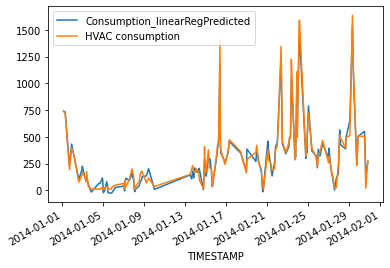

In [ ]:
DF_linearRegPredicted_jan = DF_linearRegPredicted.loc["2014-01-01":"2014-01-30"]
DF_linearRegPredicted_jan.plot()

We can see that or "trained machine" are predicting acceptably the "test" data (comparing the values of trained model to the real consumption values of the test data, shows a few differences at the first look).

To have an initial sense of the deviation of the data related to these target 5 months, we can draw also the below plot.

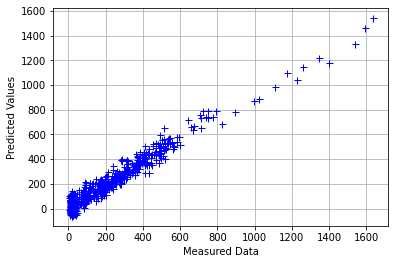

In [ ]:
plt.plot(y_test,linearRegPredicted,"+",color="b",markersize=7)
plt.xlabel("Measured Data")
plt.ylabel("Predicted Values")
plt.grid()

To discuss about the variation of the values, we can use the accurate numerical errors. In fact, these error functions shows the deviation between the real values from the predicted ones. There are different types of error that we can import them from the sklearn.matrics as below and calculating them:

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg = mean_absolute_error(linearRegPredicted,y_test)
MSE_linearReg = mean_squared_error(linearRegPredicted,y_test)
R2_linearReg = r2_score(linearRegPredicted,y_test)

In [ ]:
print("MAE: " + str(round(MAE_linearReg,1)) + " MSE: " + str(round(MSE_linearReg,1)) + " R2: " + str((round(R2_linearReg,4))))

MAE: 39.3 MSE: 2549.4 R2: 0.9506


Considering the **R^2** error, as we know that based on the definition of this error function, accurate prediction should lead to R^2 score colser to 1. The deviation from 1, indicates the inaccuracy in the prediction.

In our model, as this score is 0.95, we can conclude at this stage that our model is predicting acceptably the HVAC consumption based on the variables that we defined for our objective function.

###3-2-2- Cross validation

We can implement another type of train and test model which is named cross validation. In summary, this model eliminate the effect of chance and probability which occurs by the previous splitting type model.

In [ ]:
from sklearn.model_selection import cross_val_predict
linearRegPredicted_CV = cross_val_predict(linearReg,DF_features,DF_target,cv=10)

In [ ]:
DF_linearRegPredicted_CV = pd.DataFrame(linearRegPredicted_CV,index=DF_target.index,columns=["Consumption_linearRegPredicted_CV"])
DF_linearRegPredicted_CV = DF_linearRegPredicted_CV.join(DF_target)
DF_linearRegPredicted_CV.head(3)

,Consumption_linearRegPredicted_CV,HVAC consumption
TIMESTAMP,,
2013-11-11 00:00:00,76.076004,24.292
2013-11-11 01:00:00,21.535526,24.333
2013-11-11 02:00:00,18.978157,25.083


**Check the trained model**

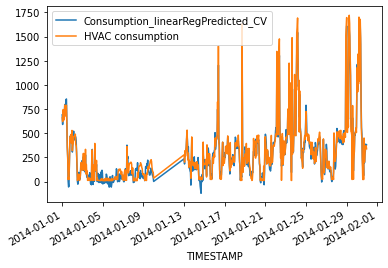

In [ ]:
DF_linearRegPredicted_CV_jan = DF_linearRegPredicted_CV.loc["2014-01-01":"2014-01-30"]
DF_linearRegPredicted_CV_jan.plot()

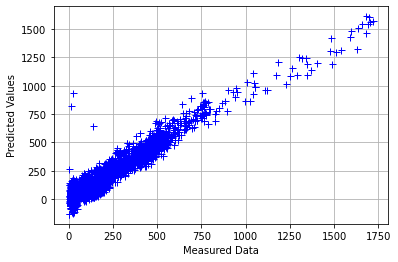

In [ ]:
plt.plot(DF_target,linearRegPredicted_CV,"+",color="b",markersize=7)
plt.xlabel("Measured Data")
plt.ylabel("Predicted Values")
plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_CV = mean_absolute_error(linearRegPredicted_CV,DF_target)
MSE_linearReg_CV = mean_squared_error(linearRegPredicted_CV,DF_target)
R2_linearReg_CV = r2_score(linearRegPredicted_CV,DF_target)

In [ ]:
print("MAE: " + str(round(MAE_linearReg_CV,1)) + " MSE: " + str(round(MSE_linearReg_CV,1)) + " R2: " + str((round(R2_linearReg_CV,4))))

MAE: 45.3 MSE: 3958.0 R2: 0.9234


As we can compare the error and dispersion of data in two models, we can see that in our application, the splitting model performed more accurate than the cross validation.

#4- Feature selection

As we discussed previously, we implemented the machine learning model for all the features that we created at the feature generation step. However, we know that not all these features are relevant for the prediction procedure. Additionally, by omitting some of these features, we can teach our model with less cost and more accuracy.

The basic idea for omitting some of the features that we defined for our model, is to omit one by one the features, do the exact same procedure up to calculating the errors. If the newly calculated error shows us more accuracy (e.g. for R^2 score, if the new error is closer to 1), we can conclude that omitting this feature, improve the functionality of our machine learning model.

We can also use some previously developed functions that work based on the same logic that we discussed. Below, there is a pre-prepared function that we used in this project for the feature selection precess:

In [ ]:
def Dev (y_true, y_pred):
    from sklearn.metrics import r2_score
    import numpy as np
    return 100*np.sum(np.abs(y_pred - y_true))/np.sum(np.abs(y_true)),r2_score(y_pred,y_true)


def WAPE (y_true, y_pred):
    import numpy as np
    return  100*np.sum(np.abs(y_pred - y_true))/np.sum(np.abs(y_true))

def plot_y_feat (WAPE_features , plt_name = 'Name [-]' ):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import matplotlib.path as mpath
    import numpy as np
    
    plt.figure(1,figsize=(13,5))
    plt.style.use('seaborn-whitegrid')
    plt.axis ('auto')
    plt.plot(np.arange(len(WAPE_features.index)), np.array(WAPE_features), color = 'blue',  markersize = 5, linestyle = '-')
    plt.xticks(np.arange(len(WAPE_features.index)),WAPE_features.index, rotation=40, fontsize=8,horizontalalignment="right", wrap=True)
    plt.ylabel('WAPE [%]', wrap=True)
    fig = plt.figure(1)
    fig.canvas.set_window_title(plt_name)
    
    

def feature_sel_1 (estimator,Features,Target,Save_address,cv=10):
  import pandas as pd
  from sklearn.model_selection import cross_val_predict
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  import os
  # Find the correlation matrix, and find the abs(correlation) of each feature with the target
  correlation = abs((pd.concat((Features,Target), axis = 1).corr())[Target.columns[0]]).sort_values(ascending=False).dropna().drop(Target.columns[0])
  correlation_list  = list(correlation.index) 

  # Order the features based on the corresponding correlation
  DF_Features=pd.DataFrame(index = Features.index)
  FeatureSelection = pd.Series(index = correlation_list) 
  for feat in correlation_list:
    DF_Features= pd.concat((DF_Features, Features[feat]), axis=1)
    FeatureSelection[feat]=WAPE(Target.iloc[:,0],pd.DataFrame(index=Target.index,data=cross_val_predict(estimator,DF_Features,Target, cv = cv, n_jobs = -1)).iloc[:,0])


  #choose the set of features which leads to minimum WAPE
  FeatureSelection_selected = FeatureSelection[:(str(FeatureSelection[(FeatureSelection == FeatureSelection.min())].index.values.tolist()).replace("['",'').replace("']",''))]   

  #among the remaining features, the ones that increase the overall obtained error are discarded
  FeatureSelection_neg = FeatureSelection 

  for feat in  correlation_list[1:]:
      if ((FeatureSelection.shift(+1)).loc[feat]) >= (FeatureSelection.loc[feat]): 
          continue
      else:
          FeatureSelection_neg = FeatureSelection_neg.drop([feat])

  FeatureSelection_neg_after = FeatureSelection_neg[(str(FeatureSelection[(FeatureSelection == FeatureSelection.min())].index.values.tolist()).replace("['",'').replace("']",'')):].drop((str(FeatureSelection[(FeatureSelection == FeatureSelection.min())].index.values.tolist()).replace("['",'').replace("']",'')))
  
  #the remaining ones are sorted in a descending order based on the overall error obtained while adding them.
  FeatureSelection_selected = pd.concat((FeatureSelection_neg_after.sort_values(ascending=False),FeatureSelection_selected.sort_values(ascending=False)), axis = 0)
  
  #Plot and save the figure
  plt_name ='selected_features_step1'+'.png'
  plot_y_feat(FeatureSelection , plt_name = plt_name)
  plt.savefig(os.path.join(Save_address,plt_name), dpi = (400))

  return FeatureSelection_selected

def feature_sel_2(estimator,Features,Target,FeatureSelection,Save_address,cv=10):
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  import os

  #Selection of the features according to their WAPE
  import pandas as pd
  from sklearn.model_selection import cross_val_predict
  DF_features_selected = Features[FeatureSelection.index]
  #reverse the order of columns
  DF_features_selected=DF_features_selected.iloc[:, ::-1]


  #same as previous step features are added gradually and the obtained WAPE is monitored
  FeatureSelection = pd.Series(index = DF_features_selected.columns) 
  DF_Features=pd.DataFrame(index = Features.index)
  for feat in DF_features_selected.columns:
    DF_Features= pd.concat((DF_Features, DF_features_selected[feat]), axis=1)
    FeatureSelection[feat]=WAPE(Target.iloc[:,0],pd.DataFrame(index=Target.index,data=cross_val_predict(estimator,DF_Features,Target, cv = cv, n_jobs = -1)).iloc[:,0])
  
  #Selecting the set of features which leads to minmum WAPE
  FeatureSelection_selected_updated = FeatureSelection[:(str(FeatureSelection[(FeatureSelection == FeatureSelection.min())].index.values.tolist()).replace("['",'').replace("']",''))]          
  
  
  #Plot and save the figure
  plt_name ='selected_features_step2'+'.png'
  plot_y_feat(FeatureSelection , plt_name = plt_name)
  plt.savefig(os.path.join(Save_address,plt_name), dpi = (400))

  return FeatureSelection_selected_updated



def feature_sel_3(algorithm,Features,Target,FeatureSelection,Save_address,cv=10):
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  import os
  import pandas as pd
  from sklearn.model_selection import cross_val_predict
  DataSet_features=Features[FeatureSelection.index]

  DF_features=DataSet_features.copy()
  features=pd.DataFrame(index=DataSet_features.index)
  Final_WAPE_results=pd.Series()

  for i in range(len(DataSet_features.columns)) :
    WAPE_values_this_iter=pd.Series()
    for feat in DF_features.columns :
      features=pd.concat((features,DataSet_features[feat]),axis=1)
      WAPE_values_this_iter[feat]=WAPE(Target.iloc[:,0],pd.DataFrame(index=Target.index,data=cross_val_predict(algorithm,features,Target, cv = cv, n_jobs = -1)).iloc[:,0])
      features=features.drop(feat,axis=1)
      
    features=pd.concat((features,DataSet_features[WAPE_values_this_iter.idxmin()]),axis=1)
    DF_features=DF_features.drop(WAPE_values_this_iter.idxmin(),axis=1)
    Final_WAPE_results[WAPE_values_this_iter.idxmin()]=WAPE_values_this_iter.min()
    


  FeatureSelection_final = Final_WAPE_results[:(str(Final_WAPE_results[(Final_WAPE_results == Final_WAPE_results.min())].index.values.tolist()).replace("['",'').replace("']",''))]          
  DF_features_selected_Final = DataSet_features[FeatureSelection_final.index]
 
  #Plot and save the figure
  plt_name ='selected_features_step3'+'.png'
  plot_y_feat(Final_WAPE_results)
  plt.savefig(os.path.join(Save_address,plt_name), dpi = (400))

  return DF_features_selected_Final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


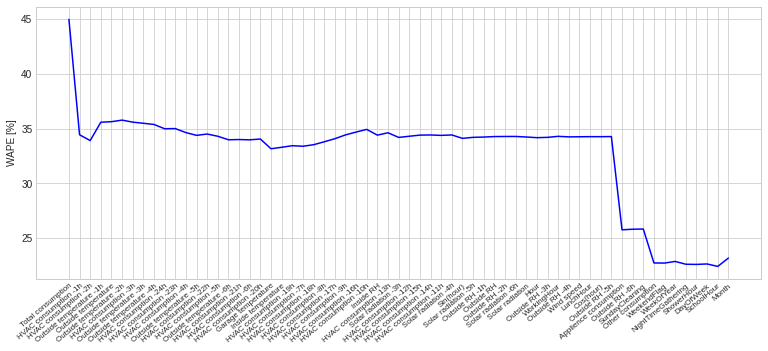

In [ ]:
path_to_save = "/content/gdrive/MyDrive/Colab Notebooks/N-Final Project"
cv = 5
featureSelection_1 = feature_sel_1(linearReg,DF_features,pd.DataFrame(DF_target),path_to_save,cv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


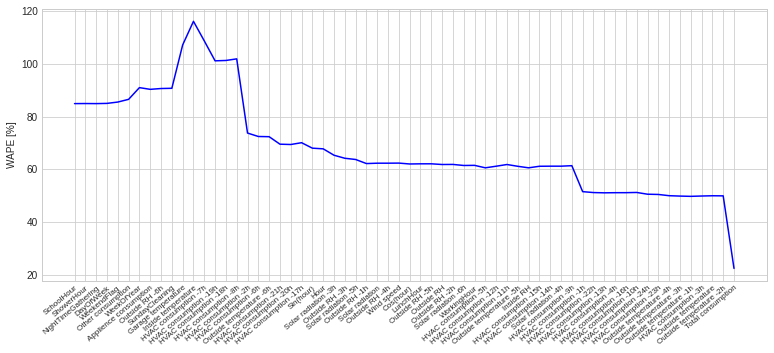

In [ ]:
featureSelection_2 = feature_sel_2(linearReg,DF_features,pd.DataFrame(DF_target),featureSelection_1,path_to_save,cv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:116: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


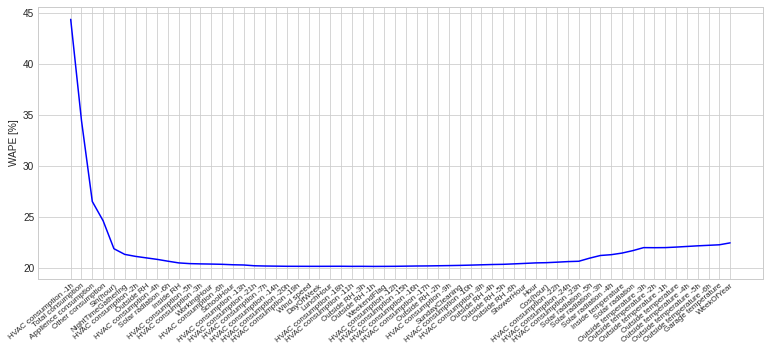

In [ ]:
Selected_Features = feature_sel_3(linearReg,DF_features,pd.DataFrame(DF_target),featureSelection_2,path_to_save,cv)

#5- Algorithm optimization

At this step, our aim is to choose the best algorithm for our model, considering the recent selected features that are generated in the previous step.

The rational procedure at this stage is to define different algorithms and calculate the target parameter (HVAC consumption in our case) and then, analyze the error to know wether it is reduced or not.

We can automize this procedure like the one that we performed in the feature selection stage. In our project, as the error with the linear regression model is already acceptable, we only perform another machine learning algorithm to show the procedure we defined.

In fact, we first re-calculate the errors based on **linear regression** model, and the compare it with other algprithm, named **random forests**.

We'll also use cross validation in both cases as the train-test model.

##5-1- Algorithm: LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import cross_val_predict
linearRegPredicted_CV_sel = cross_val_predict(linearReg,Selected_Features,DF_target,cv=10)

In [ ]:
DF_linearRegPredicted_CV_sel = pd.DataFrame(linearRegPredicted_CV_sel,index=DF_target.index,columns=["Consumption_linearRegPredicted_CV_sel"])
DF_linearRegPredicted_CV_sel = DF_linearRegPredicted_CV_sel.join(DF_target)

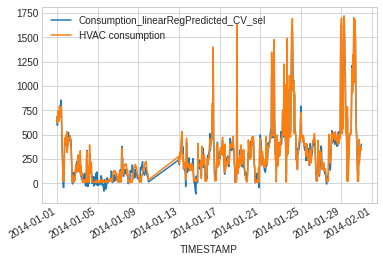

In [ ]:
DF_linearRegPredicted_CV_sel_jan = DF_linearRegPredicted_CV_sel.loc["2014-01-01":"2014-01-30"]
DF_linearRegPredicted_CV_sel_jan.plot()

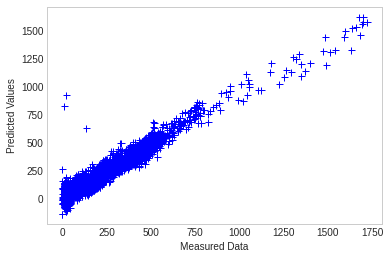

In [ ]:
plt.plot(DF_target,linearRegPredicted_CV_sel,"+",color="b",markersize=7)
plt.xlabel("Measured Data")
plt.ylabel("Predicted Values")
plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_CV_sel = mean_absolute_error(linearRegPredicted_CV_sel,DF_target)
MSE_linearReg_CV_sel = mean_squared_error(linearRegPredicted_CV_sel,DF_target)
R2_linearReg_CV_sel = r2_score(linearRegPredicted_CV_sel,DF_target)

In [ ]:
print("MAE: " + str(round(MAE_linearReg_CV_sel,1)) + " MSE: " + str(round(MSE_linearReg_CV_sel,1)) + " R2: " + str((round(R2_linearReg_CV_sel,4))))

MAE: 42.1 MSE: 3471.3 R2: 0.9313


##5-2- Algorithm: **RANDOM FORESTS**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForReg = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_predict
randomForPredicted_CV = cross_val_predict(randomForReg,Selected_Features,DF_target,cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
DF_randomForPredicted_CV = pd.DataFrame(randomForPredicted_CV,index=DF_target.index,columns=["Consumption_randomForPredicted_CV"])
DF_randomForPredicted_CV = DF_randomForPredicted_CV.join(DF_target)

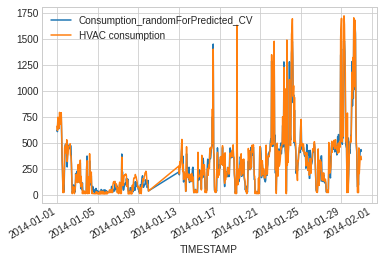

In [ ]:
DF_randomForPredicted_CV_jan = DF_randomForPredicted_CV.loc["2014-01-01":"2014-01-30"]
DF_randomForPredicted_CV_jan.plot()

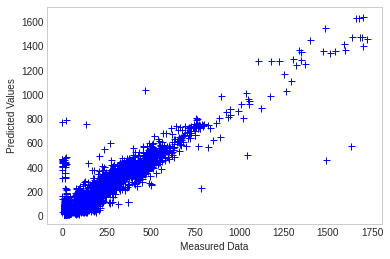

In [ ]:
plt.plot(DF_target,randomForPredicted_CV,"+",color="b",markersize=7)
plt.xlabel("Measured Data")
plt.ylabel("Predicted Values")
plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_randomFor_CV = mean_absolute_error(randomForPredicted_CV,DF_target)
MSE_randomFor_CV = mean_squared_error(randomForPredicted_CV,DF_target)
R2_randomFor_CV = r2_score(randomForPredicted_CV,DF_target)

In [ ]:
print("MAE: " + str(round(MAE_randomFor_CV,1)) + " MSE: " + str(round(MSE_randomFor_CV,1)) + " R2: " + str((round(R2_randomFor_CV,4))))

MAE: 42.8 MSE: 6068.3 R2: 0.8703


As we can see from the calculated errors, the **linear regression** algorithm leads to lower error compare to the **random forests** algorithm. So, for our machine learning model base on the characteristics of the data, the **linear regression** is the more optimized algorithm.